# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [4]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [75]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

test_df_full = pd.read_csv("travel_insurance_prediction_test_full.csv")

## Setting Seed Value

In [76]:
seed_val = 42

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model.

In [77]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [82]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,26,Private Sector/Self Employed,Yes,1400000,7,1,Yes,Yes
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


In [93]:
test_df_full.head()
test_df_full_final = test_df_full.drop(test_df_full.columns[0], axis=1)
test_df_full_final

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No,0
1,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes,1
2,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes,1
3,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
4,1497,34,Private Sector/Self Employed,No,1400000,4,0,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...
491,1942,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No,0
492,1886,25,Private Sector/Self Employed,No,600000,4,1,Yes,No,0
493,1974,25,Private Sector/Self Employed,No,600000,4,1,Yes,No,0
494,1969,29,Private Sector/Self Employed,Yes,500000,4,0,No,No,1


**TravelInsurance** is the column that we should predict. That column is not present in the test set.

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [87]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [88]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.000000,497.000000
mean,1739.000000,29.593561,9.481891e+05,4.686117,0.285714
std,143.615807,3.014715,3.640841e+05,1.516731,0.452209
min,1491.000000,25.000000,3.000000e+05,2.000000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.000000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.000000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.000000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.000000,1.000000


## Baseline

In this section we present a baseline based on a decision tree classifier.

Many of the attributes are binary, there are a couple of numeric attributes, we might be able to one-hot (e.g. family members), or event discretize (age and anual income), this will come more clearly after the EDA.

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### Transform the columns into features

First we need to transform the columns into features. The type of features we use will have a direct impact on the final result. In this example we decided to discretize some numeric features and make a one hot encoding of others. The number of bins, what we use as a one hot encoding, etc, is all up to you to try it out.

In [94]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")

We transform the train and test data. In order to avoid overfitting is better to remove the `Customer` column and we don't want the `TravelInsurance` column as part of the attributes either.

In [96]:


X_train_full = transformer.fit_transform(test_df_full_final.drop(columns=["Customer", "TravelInsurance"]))
y_train_full = test_df_full_final["TravelInsurance"].values



In [98]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["Customer", "TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=["Customer"]))

### Grid Search

We do a Grid Search for the Decision Tree (this can be replaced by a randomized search if the model is too complex).

In [99]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [3, 6, 10]
}
tree = DecisionTreeClassifier(random_state=seed_val)
tree_clf = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_

In [100]:
best_tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [101]:
print(classification_report(y_train, best_tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       958
           1       0.86      0.66      0.75       532

    accuracy                           0.84      1490
   macro avg       0.85      0.80      0.82      1490
weighted avg       0.84      0.84      0.84      1490



In [104]:
print(classification_report(y_train_full, best_tree_clf.predict(X_train_full)))


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       318
           1       0.83      0.60      0.70       178

    accuracy                           0.81       496
   macro avg       0.82      0.77      0.78       496
weighted avg       0.81      0.81      0.80       496



## Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [105]:
test_id = test_df["Customer"]
test_pred = best_tree_clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("../data/travel_insurance_submission.csv", header=True, index=False)

# Pruebas

- https://www.kaggle.com/para24/comparing-performance-of-13-classifiers-f1-score


In [106]:
from sklearn import metrics

train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")

test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")


primary_eval_metric = metrics.f1_score

confusion_lbs = ['No TravelInsurance', 'TravelInsurance']

In [107]:
def get_metrics(true_values, pred_values):
    
    result = {
        'precision_score' : precision_score(true_values, pred_values) ,
        'recall_score': recall_score(true_values, pred_values),
        'f1_score' : f1_score(true_values, pred_values),
        'accuracy_score': accuracy_score(true_values, pred_values)
    }
    
    return result

def plot_metrics(model, X_train, y_train, y_train_pred):
    result = get_metrics(y_train, y_train_pred)
    print(result)
    
    plot_confusion_matrix(model, X_train, y_train)  
    

{'precision_score': 0.863080684596577, 'recall_score': 0.6635338345864662, 'f1_score': 0.7502656748140277, 'accuracy_score': 0.8422818791946308}


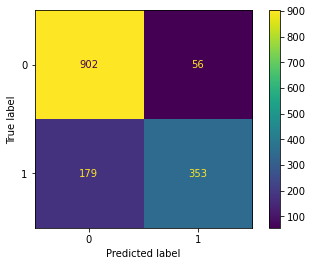

In [108]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

y_train_pred = best_tree_clf.predict(X_train)

plot_metrics(best_tree_clf, X_train, y_train,y_train_pred )

In [109]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Levels', 'No. of Levels',
                                    'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def return_categoricals(df, threshold=5):
    """
        Returns a list of columns that have less than or equal to
        `threshold` number of unique categorical levels
    """
    return list(filter(lambda c: c if len(df[c].unique()) <= threshold else None,
                       df.columns))


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [110]:
summarize_categoricals(train_df, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
Customer,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1490,0
Age,"[33, 28, 31, 25, 26, 35, 27, 34, 32, 29, 30]",11,0
Employment Type,"[Private Sector/Self Employed, Government Sector]",2,0
GraduateOrNot,"[Yes, No]",2,0
AnnualIncome,"[550000, 800000, 1250000, 300000, 1350000, 400...",30,0
FamilyMembers,"[6, 7, 4, 3, 5, 2, 8, 9]",8,0
ChronicDiseases,"[0, 1]",2,0
FrequentFlyer,"[No, Yes]",2,0
EverTravelledAbroad,"[No, Yes]",2,0
TravelInsurance,"[1, 0]",2,0


In [111]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer,1490.0,745.500000,430.270264,1.0,373.25,745.5,1117.75,1490.0
Age,1490.0,29.667114,2.880994,25.0,28.00,29.0,32.00,35.0
AnnualIncome,1490.0,927818.791946,381171.545186,300000.0,600000.00,900000.0,1250000.00,1800000.0
FamilyMembers,1490.0,4.777181,1.640248,2.0,4.00,5.0,6.00,9.0
ChronicDiseases,1490.0,0.275839,0.447086,0.0,0.00,0.0,1.00,1.0
TravelInsurance,1490.0,0.357047,0.479290,0.0,0.00,0.0,1.00,1.0


In [112]:
to_cast = return_categoricals(train_df, threshold=5)
train_df_cast = to_categorical(to_cast, train_df)
train_df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Customer             1490 non-null   int64   
 1   Age                  1490 non-null   int64   
 2   Employment Type      1490 non-null   category
 3   GraduateOrNot        1490 non-null   category
 4   AnnualIncome         1490 non-null   int64   
 5   FamilyMembers        1490 non-null   int64   
 6   ChronicDiseases      1490 non-null   category
 7   FrequentFlyer        1490 non-null   category
 8   EverTravelledAbroad  1490 non-null   category
 9   TravelInsurance      1490 non-null   category
dtypes: category(6), int64(4)
memory usage: 56.0 KB


In [113]:
train_df_cast = train_df_cast.drop(columns=["Customer"])


In [114]:
to_cast_test = return_categoricals(test_df, threshold=5)
test_df_cast = to_categorical(to_cast_test, test_df)
test_df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Customer             497 non-null    int64   
 1   Age                  497 non-null    int64   
 2   Employment Type      497 non-null    category
 3   GraduateOrNot        497 non-null    category
 4   AnnualIncome         497 non-null    int64   
 5   FamilyMembers        497 non-null    int64   
 6   ChronicDiseases      497 non-null    category
 7   FrequentFlyer        497 non-null    category
 8   EverTravelledAbroad  497 non-null    category
dtypes: category(5), int64(4)
memory usage: 18.6 KB


In [115]:
test_df_cast = test_df_cast.drop(columns=["Customer"])

## Correlación entre variables cuantitativas (descretas - continuas)

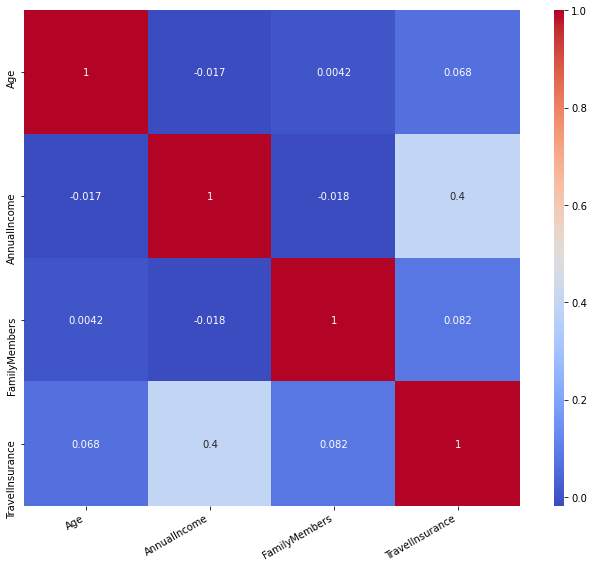

In [116]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=train_df_cast.astype({'TravelInsurance': 'int64'}).corr(),
            annot=True, cmap='coolwarm', cbar_kws={'aspect': 50},
            square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

**AnnualIncome** es la variable continua que más correlacionada esta con TraverlInsurance

In [117]:
selected_numerical_columns = ['AnnualIncome']

#selected_numerical_columns = list(train_df_cast.select_dtypes(exclude='category').columns)


## Correlación entre variables categoricas (descretas - continuas)

In [118]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    
    try:
        chi2 = chi2_contingency(contingency_table)[0]
    except ValueError:
        return np.NaN
    
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [119]:
def categorical_corr_matrix(df):
    """
        Computes corrected Cramer's V statistic between all the
        categorical variables in the dataframe
    """
    df = df.select_dtypes(include='category')
    cols = df.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    excluded_cols = list()
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            df_crosstab = pd.crosstab(df[col1], df[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
                
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

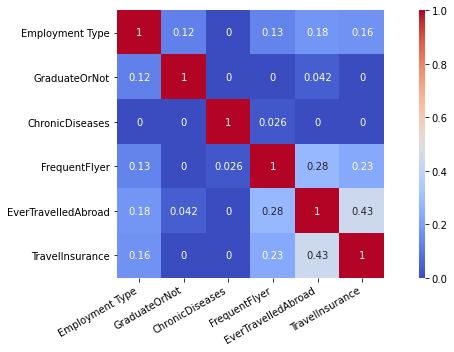

In [120]:
from scipy.stats import chi2_contingency

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(categorical_corr_matrix(train_df_cast), annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

**EverTravelledAbroad, FrequentFlyer y Employment Type** son las variables categóricas más correlacionadas con TraverlInsurance

In [121]:
selected_categorical_columns = ['EverTravelledAbroad', 'FrequentFlyer' , 'Employment Type']

#selected_categorical_columns = list(train_df_cast.select_dtypes(include='category').columns)[0:-1]


## Distribución de frecuencia de variables categóricas

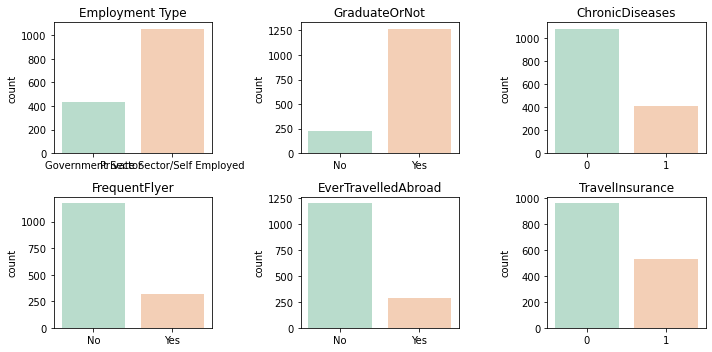

In [122]:
import pandas as pd

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
titles = list(train_df_cast.select_dtypes(include='category'))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=train_df_cast, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')

plt.tight_layout()

Se puede observar que el data set esta desbalanceado

## Distribución de frecuencia de variables continuas

['Age', 'AnnualIncome', 'FamilyMembers']
x
x
x


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

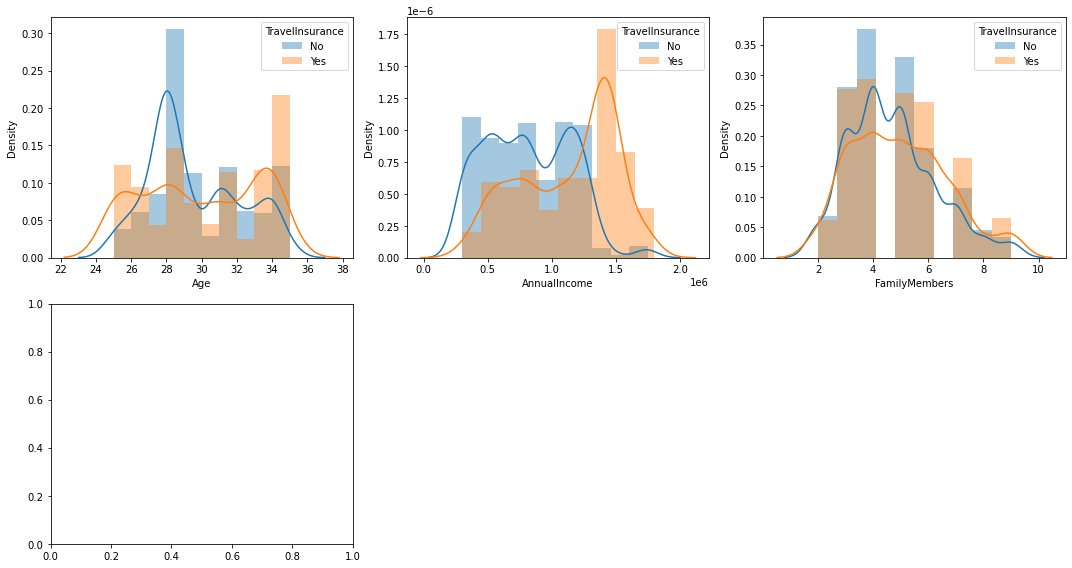

In [123]:
df_grouped = train_df_cast.groupby(by='TravelInsurance')
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
titles = list(train_df_cast.select_dtypes(exclude='category'))

print (titles)

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    print ("x")
    sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='No')
    sns.distplot(df_grouped.get_group(1)[title], bins=10, ax=ax, label='Yes')
    ax.legend(title='TravelInsurance')

axs.flat[-1].remove()
axs.flat[-2].remove()
fig.tight_layout()

Conteo de TravelInsurance  en base a  EverTravelledAbroad, FrequentFlyer y Employment Type

In [124]:
def modified_countplot(**kargs):
    """
        Assumes that columns to be plotted are in of pandas dtype='CategoricalDtype'
    """
    facet_gen = kargs['facet_generator']    ## Facet generator over facet data
    curr_facet, facet_data = None, None
    
    while True:
        ## Keep yielding until non-empty dataframe is found
        curr_facet = next(facet_gen)            ## Yielding facet genenrator
        df_rows = curr_facet[1].shape[0]
        
        ## Skip the current facet if its corresponding dataframe empty
        if df_rows:
            facet_data = curr_facet[1]
            break
    
    x_hue = (kargs.get('x'), kargs.get('hue'))
    cols = [col for col in x_hue if col]
    col_categories = [facet_data[col].dtype.categories if col else None for col in x_hue]
    
    palette = kargs['palette'] if 'palette' in kargs.keys() else 'Pastel2'
    sns.countplot(x=cols[0], hue=x_hue[1], 
                  order=col_categories[0], hue_order=col_categories[1],
                  data=facet_data.loc[:, cols], palette=palette)

EverTravelledAbroad                No                               \
FrequentFlyer                      No                                
Employment Type     Government Sector Private Sector/Self Employed   
TravelInsurance                                                      
0                                 292                          484   
1                                  68                          170   

EverTravelledAbroad                                                 \
FrequentFlyer                     Yes                                
Employment Type     Government Sector Private Sector/Self Employed   
TravelInsurance                                                      
0                                  26                           94   
1                                  12                           56   

EverTravelledAbroad               Yes                               \
FrequentFlyer                      No                                
Employment Type     Government Sector Private Sector/Self Employed   
TravelInsurance                                                      
0                                  11                           36   
1                                   7                          105   

EverTravelledAbroad                                                 
FrequentFlyer                     Yes                               
Employment Type     Government Sector Private Sector/Self Employed  
TravelInsurance                                                     
0                                   4                           11  
1                                  13                          101

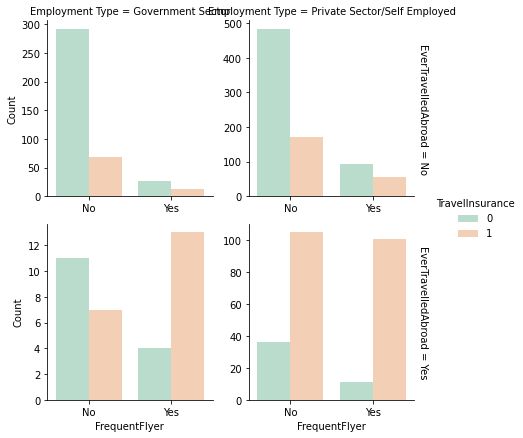

In [125]:
display(pd.crosstab(train_df_cast['TravelInsurance'], [train_df_cast['EverTravelledAbroad'],
                                        train_df_cast['FrequentFlyer'],
                                        train_df_cast['Employment Type']],
                    dropna=False))

facet = sns.FacetGrid(train_df_cast, row='EverTravelledAbroad', col='Employment Type', sharex=False,
                      sharey=False, margin_titles=True)
facet.map(modified_countplot, x='FrequentFlyer', hue='TravelInsurance',
          palette='Pastel2', facet_generator=facet.facet_data())
facet.set_xlabels('FrequentFlyer')
facet.set_ylabels('Count')
facet.add_legend(title='TravelInsurance');

Escalamos y hacemos enconding de las features

In [126]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pippaeline(steps=[
    ('onehot', OneHotEncoder(drop=None, dtype=np.int))])


In [127]:
categorical_columns = list(train_df_cast.select_dtypes(include='category').columns)[0:-1]
numeric_columns = list(train_df_cast.select_dtypes(exclude='category').columns)


#categorical_columns = selected_categorical_columns
#numeric_columns = selected_numerical_columns

In [128]:
categorical_columns

['Employment Type',
 'GraduateOrNot',
 'ChronicDiseases',
 'FrequentFlyer',
 'EverTravelledAbroad']

In [129]:
numeric_columns

['Age', 'AnnualIncome', 'FamilyMembers']

In [130]:
from sklearn.model_selection import train_test_split
x_train_df_cast_split, x_test_df_cast_split, y_train, y_test = train_test_split(train_df_cast.drop(columns = ['TravelInsurance']), train_df_cast['TravelInsurance'], test_size=0.25, random_state=seed_val,
                               shuffle=True, stratify=train_df_cast['TravelInsurance'])

In [131]:
## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)],
    remainder='passthrough')

In [132]:
train_df_cast_t = preprocessor.fit_transform(x_train_df_cast_split[categorical_columns + numeric_columns ])

test_df_cast_t = preprocessor.transform(x_test_df_cast_split[categorical_columns + numeric_columns ])




feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'] \
                            .get_feature_names(input_features=categorical_columns))
feature_names = numeric_columns + feature_names


feature_names

['Age',
 'AnnualIncome',
 'FamilyMembers',
 'Employment Type_Government Sector',
 'Employment Type_Private Sector/Self Employed',
 'GraduateOrNot_No',
 'GraduateOrNot_Yes',
 'ChronicDiseases_0',
 'ChronicDiseases_1',
 'FrequentFlyer_No',
 'FrequentFlyer_Yes',
 'EverTravelledAbroad_No',
 'EverTravelledAbroad_Yes']

Funciones varias

In [133]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [134]:
def confusion_plot(matrix, labels=None):
    """ Display binary confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [135]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis,
                 estimator=None, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [136]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, estimator=None,
                     ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, estimator=None,
                     color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [137]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [138]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
        
        # For neural nets
        y_pred_train = np.where(y_pred_train.flatten() > 0.5, 1, 0)
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [139]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [140]:
def report(clf, x_train, y_train, x_test, y_test, display_scores=[],
           sample_weight=None, refit=False, importance_plot=False,
           confusion_labels=None, feature_labels=None, neural_net=False,
           verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    # For neural nets
    if neural_net:
        y_probs = np.copy(test_predictions)
        test_predictions = np.where(test_predictions.flatten() > 0.5, 1, 0)
    else:
        y_probs = clf.predict_proba(x_test)[:, 1]
    
    test_acc = accuracy_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, y_probs)
        
    ## Additional scores
    scores_dict = dict()
    for func in display_scores:
        scores_dict[func.__name__] = [func(y_train, train_predictions),
                                      func(y_test, test_predictions)]
        
    ## Model Memory
    model_mem = None
    if not neural_net:
        model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("---------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("---------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("---------------------------------------------")
    
    if display_scores:
        for k, v in scores_dict.items():
            score_name = ' '.join(map(lambda x: x.title(), k.split('_')))
            print(f'Train {score_name}: ', v[0])
            print(f' Test {score_name}: ', v[1])
            print()
        print("---------------------------------------------")
    
    print(" Area Under ROC (test): ", roc_auc)
    print("---------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, accuracy=[train_acc, test_acc], **scores_dict,
                train_time=train_time, train_predictions=train_predictions,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [141]:
def compare_models(y_test=None, clf_reports=[], labels=[], score='accuracy'):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
         score: is the name corresponding to the sklearn metrics
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train ' + score, 'Test ' + score, 'Overfitting', 'Accuracy', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        scores = [round(i, 3) for i in clf_reports[i][score]]
        
        roc_auc = clf_reports[i]['roc_auc']
        test_acc = clf_reports[i]['accuracy'][1]
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = scores + [scores[1] < scores[0], test_acc, roc_auc] + \
                              true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

search_params1 = {
    'tol': [ 0.01 , 0.001 , 0.0001 , 0.1],
    'penalty': ['l2' , 'l1'],
    'solver': ['liblinear' , 'saga' ],
    'class_weight' : ['balanced']
}


search_params = {
    'tol': [ 0.0001 , 0.001 , 0.0001 , 0.1],
    'penalty': ['l2'],
    'solver': ['liblinear' , 'newton-cg', 'lbfgs', 'sag' ],
    'class_weight' : ['balanced']
}



lgr = LogisticRegression()

lgr_cv = GridSearchCV(estimator =  LogisticRegression(), param_grid = search_params, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

lgr_cv.fit(train_df_cast_t, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
                         'tol': [0.0001, 0.001, 0.0001, 0.1]},
             scoring='f1')

In [143]:
lgr_cv.best_estimator_

LogisticRegression(class_weight='balanced', solver='sag', tol=0.1)

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500, n_jobs=-1,
                     random_state=42, scoring='f1', solver='sag', tol=0.1)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 1117 samples
 Test Size: 373 samples
---------------------------------------------
Training Time: 0.108 seconds
 Testing Time: 0.0 seconds
---------------------------------------------
Train Accuracy:  0.747538048343778
 Test Accuracy:  0.7050938337801609
---------------------------------------------
Train F1 Score:  0.6483790523690772
 Test F1 Score:  0.5736434108527131

---------------------------------------------
 Area Under ROC (test):  0.7331453634085214
---------------------------------------------
Model Memory Size: 7.58 kB

=============================> CLASSIFICATION REPORT <===================================
                    precision    recall  f1-score   support

No TravelInsurance       0.76      0.79      0.77      

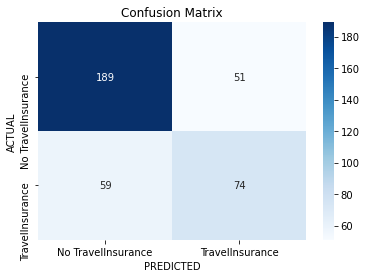


=======================================> PLOTS <=========================================


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


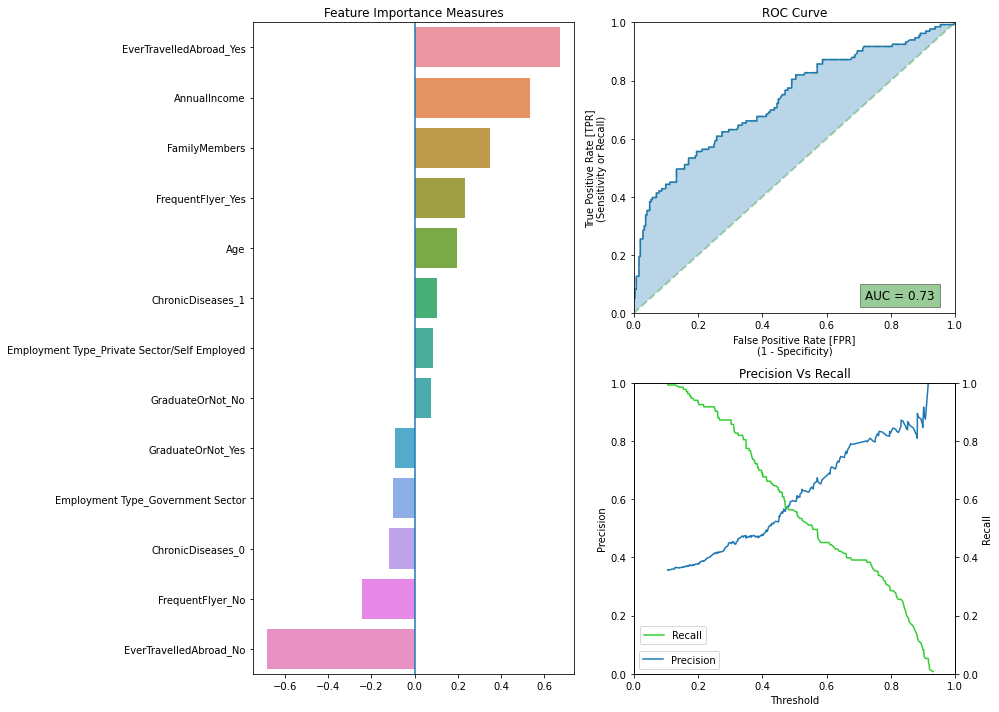

In [144]:
from sklearn.linear_model import LogisticRegressionCV


#logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5,
#                                max_iter=500, penalty='l2',
#                                scoring='f1', solver='liblinear',
#                               n_jobs=-1, random_state=seed_val,
#                                refit=True, verbose=0)


#logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5,
#                                max_iter=500, penalty='l1',
#                                scoring='f1', solver='saga',
#                                n_jobs=-1, random_state=seed_val,
#                                refit=True, tol=0.1, verbose=0)


logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5,
                                max_iter=500, penalty='l2',
                                scoring='f1', solver='sag',
                                n_jobs=-1, random_state=seed_val,
                                refit=True, tol=0.1, verbose=0)




logit_cv, logit_report = report(logit_cv, train_df_cast_t, y_train,
                                test_df_cast_t, y_test,
                                display_scores=[primary_eval_metric],
                                importance_plot=True,
                                feature_labels=feature_names,
                                confusion_labels=confusion_lbs)

## Decission Tree

In [145]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [6, 3, 10]
}



tree_cv = GridSearchCV(estimator =  DecisionTreeClassifier(random_state=seed_val), param_grid = search_params, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

tree_cv.fit(train_df_cast_t, y_train)

tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [146]:
best_tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 1117 samples
 Test Size: 373 samples
---------------------------------------------
Training Time: 0.003 seconds
 Testing Time: 0.0 seconds
---------------------------------------------
Train Accuracy:  0.8549686660698299
 Test Accuracy:  0.7801608579088471
---------------------------------------------
Train F1 Score:  0.7705382436260623
 Test F1 Score:  0.6554621848739497

---------------------------------------------
 Area Under ROC (test):  0.7889097744360902
---------------------------------------------
Model Memory Size: 14.19 kB

=============================> CLASSIFICATION REPORT <===================================
                    precision    recall  f1-score   support

No TravelInsurance       0.79      0.89      0.84       240
   TravelInsurance       0.74      0.59      0.66       133

          

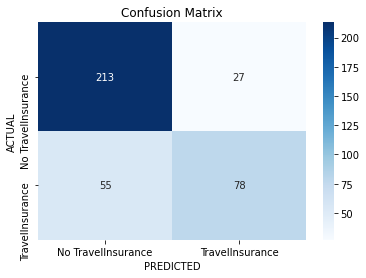


=======================================> PLOTS <=========================================


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


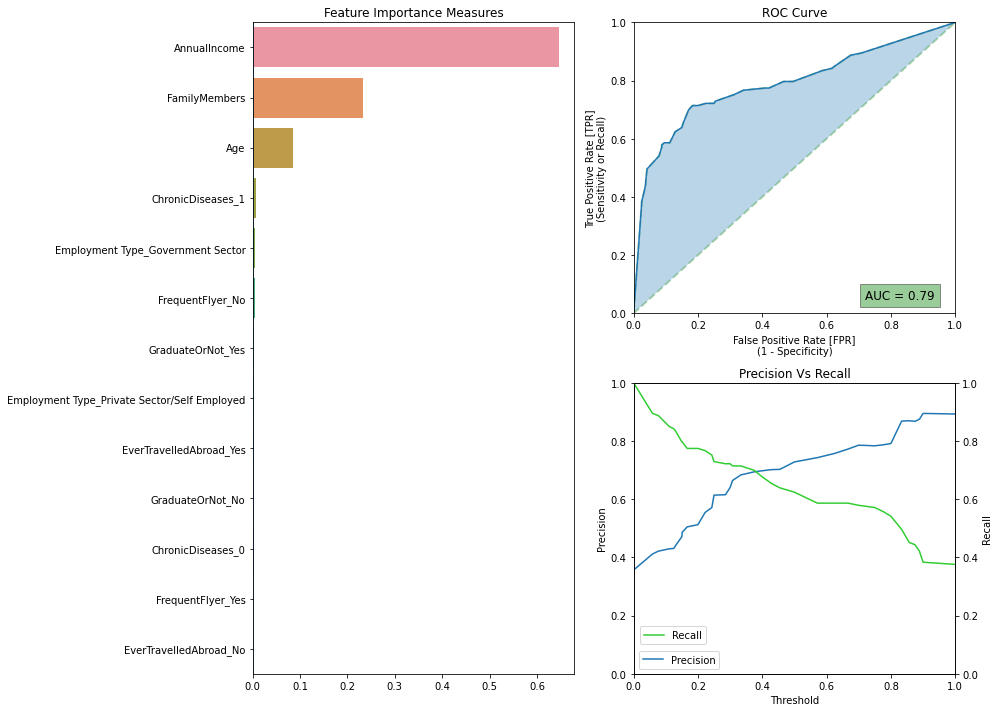

In [147]:
decision_tree = DecisionTreeClassifier(max_depth=10,
                                       random_state=seed_val, min_samples_leaf=5)

decision_tree, decision_tree_report = report(decision_tree,train_df_cast_t, y_train,
                                        test_df_cast_t, y_test,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)



In [148]:
## Random Forests

In [149]:
from sklearn.ensemble import RandomForestClassifier

search_params_rf = {
    'class_weight': ['balanced'],
    'max_depth' : [2,3,4,5],
    'criterion' : ['gini', 'entropy']
}



rf_cv = GridSearchCV(estimator =  RandomForestClassifier(random_state=seed_val), param_grid = search_params_rf, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

rf_cv.fit(train_df_cast_t, y_train)

rf_cv.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=42)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 1117 samples
 Test Size: 373 samples
---------------------------------------------
Training Time: 0.15 seconds
 Testing Time: 0.013 seconds
---------------------------------------------
Train Accuracy:  0.8075201432408237
 Test Accuracy:  0.7587131367292225
---------------------------------------------
Train F1 Score:  0.6824224519940916
 Test F1 Score:  0.6052631578947368

---------------------------------------------
 Area Under ROC (test):  0.7649749373433584
---------------------------------------------
Model Memory Size: 148.48 kB

=============================> CLASSIFICATION REPORT <===================================
                    precision    recall  f1-score   support

No TravelInsurance       0.77      0.89      0.83       240
   TravelInsurance       0.73      0.52      0.61       133

    

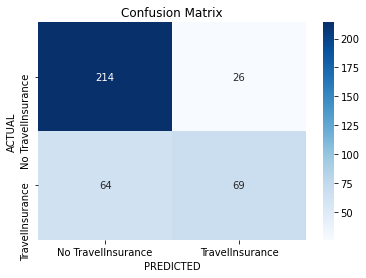


=======================================> PLOTS <=========================================


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


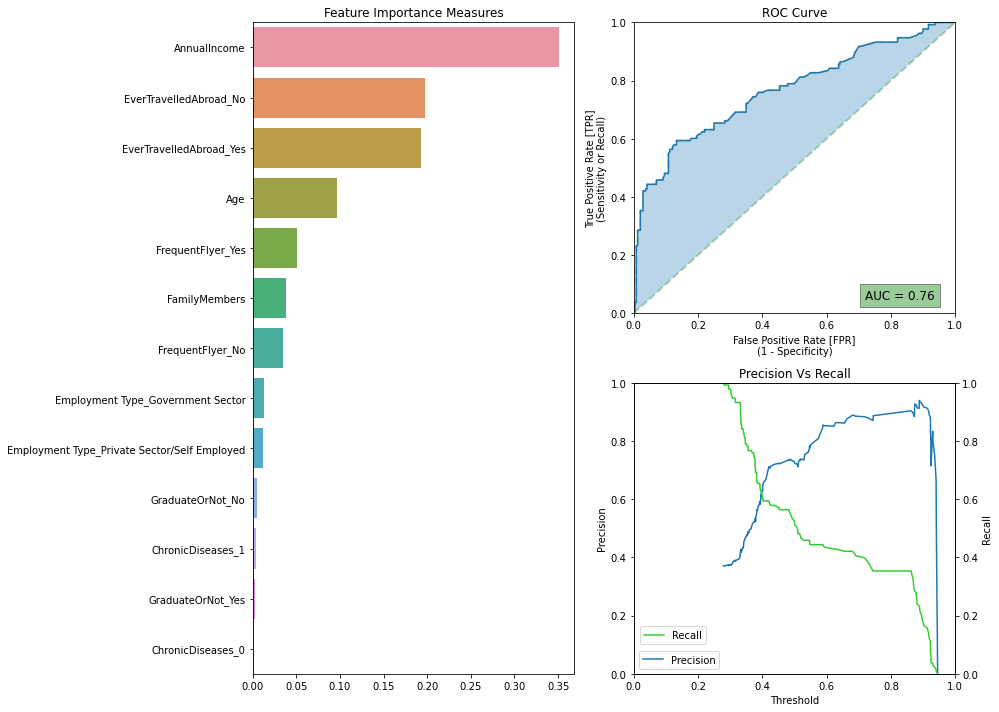

In [150]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=3, criterion='gini', random_state=seed_val)

rf, rf_report = report(rf,train_df_cast_t, y_train,
                                        test_df_cast_t, y_test,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)



## K-Nearest Neighbors

In [151]:
from sklearn.neighbors import KNeighborsClassifier

search_params_knn = {
    'n_neighbors': [3,4,5],
    'p': [ 2, 3, 4],
    'weights': ['distance']
}



knn_cv = GridSearchCV(estimator =  KNeighborsClassifier(), param_grid = search_params_knn, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

knn_cv.fit(train_df_cast_t, y_train)

knn_cv.best_estimator_

KNeighborsClassifier(p=4, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 1117 samples
 Test Size: 373 samples
---------------------------------------------
Training Time: 0.002 seconds
 Testing Time: 0.004 seconds
---------------------------------------------
Train Accuracy:  0.9444941808415398
 Test Accuracy:  0.7292225201072386
---------------------------------------------
Train F1 Score:  0.9171122994652406
 Test F1 Score:  0.5976095617529881

---------------------------------------------
 Area Under ROC (test):  0.7247807017543859
---------------------------------------------
Model Memory Size: 147.08 kB

=============================> CLASSIFICATION REPORT <===================================
                    precision    recall  f1-score   support

No TravelInsurance       0.77      0.82      0.80       240
   TravelInsurance       0.64      0.56      0.60       133

          accuracy       

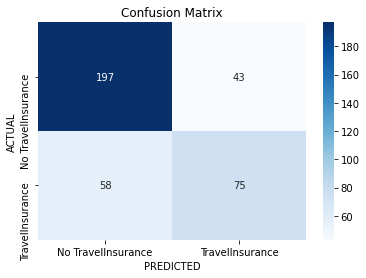


=======================================> PLOTS <=========================================


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


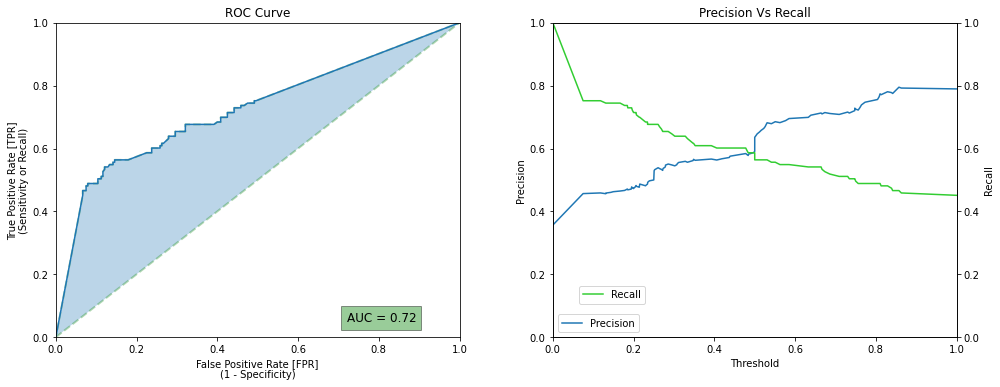

In [152]:

knn = KNeighborsClassifier(n_neighbors=4,weights = 'distance' , p = 2)

knn, knn_report = report(knn,train_df_cast_t, y_train,
                                        test_df_cast_t, y_test,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)




## SVM

In [153]:
from sklearn.svm import SVC




search_params_svc = {
    'C': [1,2],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [2,3,4],
    
   }



svm_cv = GridSearchCV(estimator =  SVC(random_state = seed_val , probability = True), param_grid = search_params_svc, cv=5, scoring='f1', n_jobs=-1 , verbose = 0 , refit = True  )

svm_cv.fit(train_df_cast_t, y_train)

svm_cv.best_estimator_

SVC(C=2, degree=2, probability=True, random_state=42)

SVC(C=1, degree=4, kernel='poly', probability=True, random_state=42)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 1117 samples
 Test Size: 373 samples
---------------------------------------------
Training Time: 0.214 seconds
 Testing Time: 0.007 seconds
---------------------------------------------
Train Accuracy:  0.8433303491495077
 Test Accuracy:  0.7908847184986595
---------------------------------------------
Train F1 Score:  0.7391952309985096
 Test F1 Score:  0.6422018348623852

---------------------------------------------
 Area Under ROC (test):  0.762781954887218
---------------------------------------------
Model Memory Size: 65.74 kB

=============================> CLASSIFICATION REPORT <===================================
                    precision    recall  f1-score   support

No TravelInsurance       0.78      0.94      0.85       240
   TravelInsurance       0.82      0.53      0.64       133

          accu

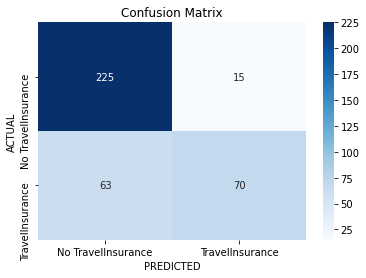


=======================================> PLOTS <=========================================


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


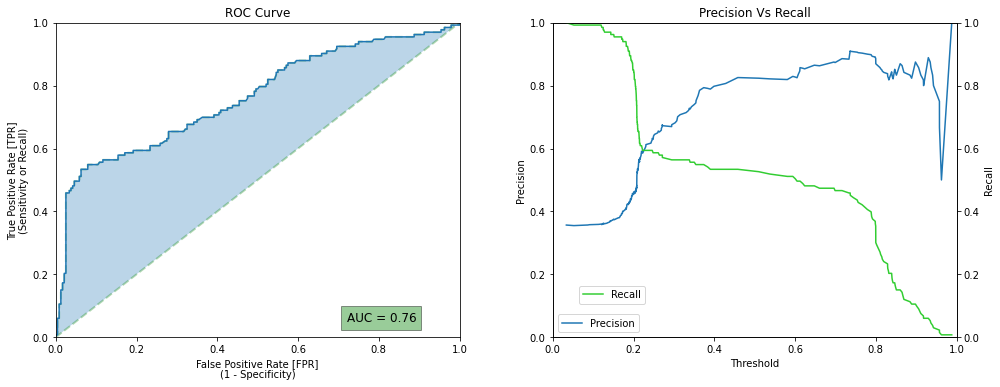

In [154]:
svc = SVC(C=1, degree=4, kernel='poly' , random_state=seed_val , probability = True)

svc, svc_report = report(svc,train_df_cast_t, y_train,
                                        test_df_cast_t, y_test,
                                        display_scores=[primary_eval_metric],
                                        importance_plot=True,
                                        feature_labels=feature_names,
                                        confusion_labels=confusion_lbs)



In [155]:
#report_list = [nb_report, logit_report, knn_report, decision_tree_report,               
#               bagging_clf_report, random_forest_report, adaboot_report,
#               xgb_report, lgbm_report, catboost_report, nn_report,
#               linear_svc_report, rbf_svc_report]

report_list = [logit_report, decision_tree_report , knn_report , svc_report , rf_report]



clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

In [156]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list,
                                             labels=clf_labels,
                                             score=primary_eval_metric.__name__)

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

In [157]:
compare_table.sort_values(by=['Overfitting', 'F1-score'], ascending=[True, False])

,Train f1_score,Test f1_score,Overfitting,Accuracy,ROC Area,Precision,Recall,F1-score,Support
DecisionTreeClassifier,0.771,0.655,True,0.780161,0.78891,0.742857,0.586466,0.655462,133
SVC,0.739,0.642,True,0.790885,0.762782,0.823529,0.526316,0.642202,133
RandomForestClassifier,0.682,0.605,True,0.758713,0.764975,0.726316,0.518797,0.605263,133
KNeighborsClassifier,0.917,0.598,True,0.729223,0.724781,0.635593,0.56391,0.59761,133
LogisticRegressionCV,0.648,0.574,True,0.705094,0.733145,0.592,0.556391,0.573643,133


In [158]:
svc = SVC(C=1, degree=4, kernel='poly' , random_state=seed_val , probability = True)
svc.fit(train_df_cast_t, y_train)

SVC(C=1, degree=4, kernel='poly', probability=True, random_state=42)

In [159]:
print(classification_report(y_train_full, svc.predict(X_train_full)))

ValueError: X.shape[1] = 19 should be equal to 13, the number of features at training time